# Install necessary packages:

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.9 MB/s eta 0:00:00


# Our imports:

In [ ]:
import torch
import random
import warnings

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM


warnings.filterwarnings(action="ignore")

# Some important variables:

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_NAME = "google/flan-t5-large"
DATASET_NAME = "sports_understanding"
DATASET_ADDRESS_TRAIN = "tasksource/bigbench"
DATASET_ADDRESS_TEST = "lukaemon/bbh"

# Load the dataset, tokenizer and the model:

In [ ]:
dataset_train = load_dataset(DATASET_ADDRESS_TRAIN, DATASET_NAME)
dataset_test = load_dataset(DATASET_ADDRESS_TEST, DATASET_NAME)

model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)
model = model.to(DEVICE)

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split:   0%|          | 0/250 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [ ]:
dataset_train

DatasetDict({
    train: Dataset({
        features: ['inputs', 'targets', 'multiple_choice_targets', 'multiple_choice_scores', 'idx'],
        num_rows: 789
    })
    validation: Dataset({
        features: ['inputs', 'targets', 'multiple_choice_targets', 'multiple_choice_scores', 'idx'],
        num_rows: 197
    })
})

In [ ]:
dataset_test

DatasetDict({
    test: Dataset({
        features: ['input', 'target'],
        num_rows: 250
    })
})

# Create our dataframe for saving the results as *.csv:

In [ ]:
df = pd.DataFrame(columns=["answer-only", "3-shot", "cot"])

# We first do "Answer-only":

In [ ]:
# inferior approach... just to show the results:

inputs = []

for text in dataset_test["test"]["input"]:
    inputs.append(text)

inputs = tokenizer(inputs, return_tensors="pt", padding=True, truncation=True).to(DEVICE)

with torch.no_grad():
    output = model.generate(**inputs)

predicted = tokenizer.batch_decode(output, skip_special_tokens=True)
print(predicted)

for idx, prediction in enumerate(predicted):
    if len(prediction) > 3:
        if "yes" in prediction.lower():
            predicted[idx] = "yes"
        elif "no" in prediction.lower():
            predicted[idx] = "no"

#df["answer-only"] = predicted

accuracy_ao = round(accuracy_score(dataset_test["test"]["target"], predicted) * 100, 2)
print(f'\nThe accuracy for "answer-only" method is: {accuracy_ao}%')

['Elias Lindholm is a famous tennis player and he won the tennis tournament', 'John Carlson is a football player and not a football player. The answer is no', 'no', 'no he was not called for the goal tend in the Eastern Conference Finals.', 'It is not possible to skate behind the net.', 'It is true because there are records of him doing so.', 'David Silva is a footballer who has played for the United States. The answer is yes', 'It is not true, and it is not a fact.', 'It is not true and it is not true at all.', 'no', 'It is not possible to play ice hockey.', 'It is not true and it is not a fact.', 'It is not true and it is outlandish of a statement.', 'It is not true and it is not a fact.', 'It is not true and it is not a fact.', 'yes', 'Freddie Freeman died in the 1970s.', 'Adam Thielen is a football player and not a footballer. The answer is', 'Tom Brady is a football player and not a football player. The answer is no.', 'no i think the sentence is false because there is no evidence

In [ ]:
# another inferior approach... just to show the results:

inputs = []

for text in dataset_test["test"]["input"]:
    prompt = "Only choose between the answers yes/no:\n\n"

    prompt += text

    inputs.append(prompt)

inputs = tokenizer(inputs, return_tensors="pt", padding=True, truncation=True).to(DEVICE)

with torch.no_grad():
    output = model.generate(**inputs)

predicted = tokenizer.batch_decode(output, skip_special_tokens=True)
print(predicted)

for idx, prediction in enumerate(predicted):
    if len(prediction) > 3:
        if "yes" in prediction.lower():
            predicted[idx] = "yes"
        elif "no" in prediction.lower():
            predicted[idx] = "no"

#df["answer-only"] = predicted

accuracy_ao = round(accuracy_score(dataset_test["test"]["target"], predicted) * 100, 2)
print(f'\nThe accuracy for "answer-only" method is: {accuracy_ao}%')

['yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'No, he was a pitcher and did not walk to first base.', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'No, Tom Wilson is a footballer and not a soccer player.', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'No, he is a football player and not a hockey player.', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'No Ramires is a footballer and not a soccer player.', 'No, he was in the first.', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'No, he was not called for the goal tend.', 'no', 'no', 'no', 'no', 'no', 'No, she did not.', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no

In [ ]:
inputs = []

for text in dataset_test["test"]["input"]:
    prompt = "Answer the following yes/no question. Only choose between the answers yes/no:\n\n"

    prompt += text

    inputs.append(prompt)

inputs = tokenizer(inputs, return_tensors="pt", padding=True, truncation=True).to(DEVICE)

with torch.no_grad():
    output = model.generate(**inputs)

predicted = tokenizer.batch_decode(output, skip_special_tokens=True)
print(predicted)

for idx, prediction in enumerate(predicted):
    if len(prediction) > 3:
        if "yes" in prediction.lower():
            predicted[idx] = "yes"
        elif "no" in prediction.lower():
            predicted[idx] = "no"

df["answer-only"] = predicted

accuracy_ao = round(accuracy_score(dataset_test["test"]["target"], predicted) * 100, 2)
print(f'\nThe accuracy for "answer-only" method is: {accuracy_ao}%')

['yes', 'yes', 'no', 'No', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'No, he was a pitcher and did not walk to first base.', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'No, Kailer Yamamoto is a Japanese footballer who is not a European', 'yes', 'no', 'yes', 'yes', 'No', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'No', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'no', 'yes', 'no', 'no', 'no', 'No', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'No', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'No', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'n

# We then do "3-shot":

In [ ]:
inputs = []

for text in dataset_test["test"]["input"]:
    random_idxs = random.sample(range(0, len(dataset_train["train"])), 3)

    prompt = ""

    for idx in random_idxs:
        prompt += "Q: Answer the following multiple choice question.\n" + dataset_train["train"][idx]["inputs"] + "\n"\
                                                            + "A: " + dataset_train["train"][idx]["targets"][0] + "\n\n"

    prompt += "Q: Answer the following yes/no question. Only choose between the answers yes/no.\n" + text + "\n" + "A: "

    inputs.append(prompt)

inputs = tokenizer(inputs, return_tensors="pt", padding=True, truncation=True).to(DEVICE)

with torch.no_grad():
    output = model.generate(**inputs)

predicted = tokenizer.batch_decode(output, skip_special_tokens=True)
print(predicted)

for idx, prediction in enumerate(predicted):
    if len(prediction) > 3:
        if "yes" in prediction.lower():
            predicted[idx] = "yes"
        elif "no" in prediction.lower():
            predicted[idx] = "no"

df["3-shot"] = predicted

accuracy_3s = round(accuracy_score(dataset_test["test"]["target"], predicted) * 100, 2)
print(f'\nThe accuracy for "3-shot" method is: {accuracy_3s}%')

['yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes',

# Lastly, we do "COT":

In [ ]:
inputs = []

for text in dataset_test["test"]["input"]:
    prompt = "Answer the following yes/no question by reasoning step-by-step. Only choose between the answers yes/no:\n\n"

    prompt += text

    inputs.append(prompt)

inputs = tokenizer(inputs, return_tensors="pt", padding=True, truncation=True).to(DEVICE)

with torch.no_grad():
    output = model.generate(**inputs, max_new_tokens=90)

predicted = tokenizer.batch_decode(output, skip_special_tokens=True)
predicted = ["yes" if "yes" in pred.split(".")[-2] else "no" for pred in predicted]
print(predicted)

df["cot"] = predicted

accuracy_cot = round(accuracy_score(dataset_test["test"]["target"], predicted) * 100, 2)
print(f'\nThe accuracy for "COT" method is: {accuracy_cot}%')

['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 

# Now, we plot the bar-plot for all modes:

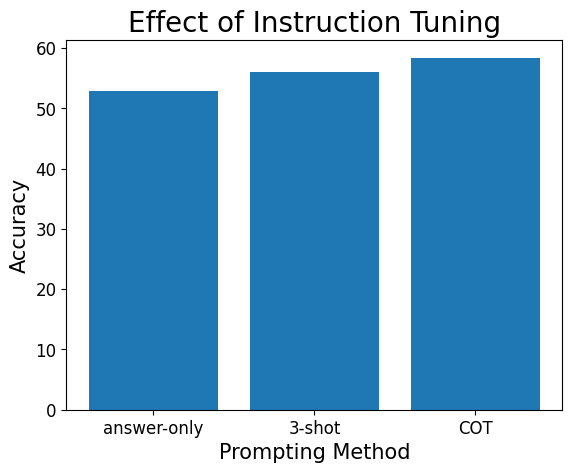

In [ ]:
plt.bar(["answer-only", "3-shot", "COT"], [accuracy_ao, accuracy_3s, accuracy_cot])

plt.xlabel("Prompting Method", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Effect of Instruction Tuning", fontsize=20)

plt.show()

# We save the *.csv file which contains predictions for each of the methods:

In [ ]:
df["ground_truth"] = dataset_test["test"]["target"]
df.head()

,answer-only,3-shot,cot,ground_truth
0,yes,yes,yes,no
1,yes,yes,no,yes
2,no,no,yes,yes
3,No,no,no,no
4,no,no,no,no


In [ ]:
df.to_csv("question2-predictions.csv", index=None)